In [1]:
import sys
sys.path.append('../../observer')

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(imgs):
    unit = 10
    rows, cols = len(imgs), 1
    fig = plt.figure(figsize=(rows*unit, cols*unit))
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

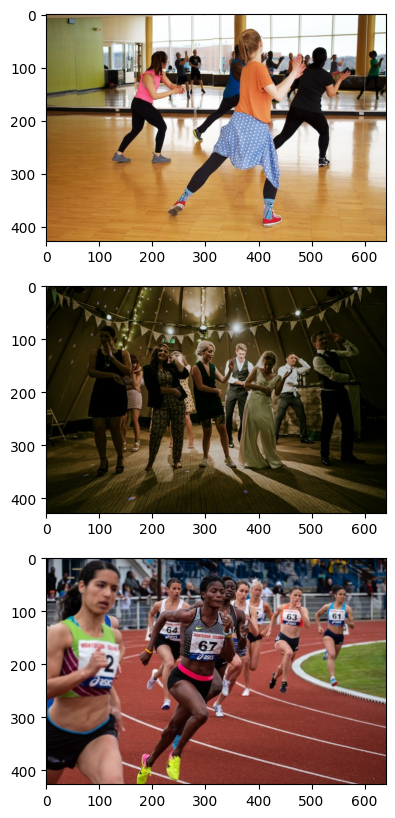

In [2]:
from observer.utils.files import get_files

imgs_origin = get_files('*.jpg', './imgs')
imgs_origin = [cv2.imread(img) for img in imgs_origin]

imshow(imgs_origin)

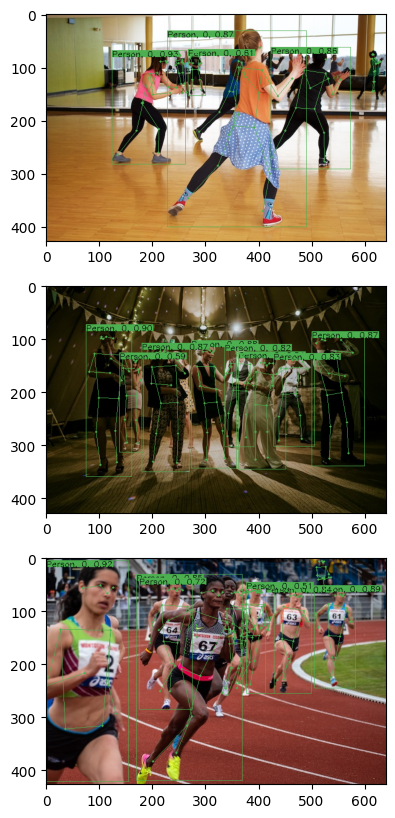

In [3]:
from observer.engine.yolov8.pose import DefaultPose
from observer.engine.yolov8.pose import PoseEstimator

estimator = PoseEstimator()
imgs_estim = []
for img in imgs_origin:
    img_copied = img.copy()
    preds = estimator.predict(img_copied, verbose=False)
    DefaultPose.plot(img_copied, preds)
    imgs_estim.append(img_copied)

imshow(imgs_estim)

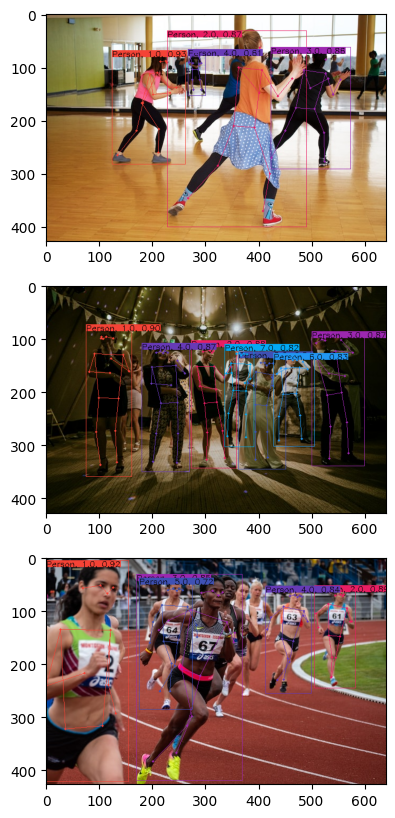

In [4]:
estimator = PoseEstimator()
imgs_estim = []
for img in imgs_origin:
    img_copied = img.copy()

    preds = estimator.track(img_copied, verbose=False)
    # persist=False가 기본값임에 유의. 연속된 프레임에서 객체를
    # 추적하려면 반드시 persist=True로 변경할 것.
    # 예) estimator.track(img, persist=True, ...)

    DefaultPose.plot(img_copied, preds, track_on=True)
    imgs_estim.append(img_copied)

imshow(imgs_estim)